In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [2]:
np.random.seed(10)
p, q = (np.random.rand(i, 2) for i in (4, 5))
p_big, q_big = (np.random.rand(i, 80) for i in (100, 120))

print(p, "\n\n", q)

[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]] 

 [[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]]


Solution
===

In [40]:
def naive(p, q):
    ''' fill your code in here...
    '''
    ans = np.zeros((p.shape[0],q.shape[0]))
    for i,pelt in enumerate(p):
        for j,qelt in enumerate(q):
            #print(np.sum((pelt-qelt)**2))
            ans[i,j] = np.sqrt(np.sum((pelt-qelt)**2))

### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [41]:
rows, cols = np.indices((p.shape[0], q.shape[0]))
print(rows, end='\n\n')
print(cols)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [42]:
print(p[rows.ravel()], end='\n\n')
print(q[cols.ravel()])

[[0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]]

[[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607

In [43]:
def with_indices(p, q):
    ''' fill your code in here...
    '''
    rows, cols = np.indices((p.shape[0], q.shape[0]))
    return np.reshape(np.sqrt(np.sum(p[rows.ravel()]-q[cols.ravel()],axis=1)),(p.shape[0],q.shape[0]))

### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [44]:
from scipy.spatial.distance import cdist

def scipy_version(p, q):
    return cdist(p, q)

### Numpy Magic

In [48]:
def tensor_broadcasting(p, q):
    print (p[:,np.newaxis,:])
    return np.sqrt(np.sum((p[:,np.newaxis,:]-q[np.newaxis,:,:])**2, axis=2))

# Compare methods

In [49]:
methods = [naive, with_indices, scipy_version, tensor_broadcasting]
timers = []
for f in methods:
    r = %timeit -o f(p_big, q_big)
    timers.append(r)

99.8 ms ± 7.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


c:\users\abhi kamboj\anaconda2\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


18.9 ms ± 566 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.09 ms ± 28.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.378

[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]



[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]



[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]



[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]



[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]



[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]



[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]



[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]



[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]



[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]



[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]



[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]



[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]



[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]



[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]



[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]



[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]



[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]



[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]



[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]



[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]



[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]



[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]



[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]



[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]

 [[0.31827281 0.51979699 0.57813643 ... 0.02116519 0.75046461 0.17604213]]

 [[0.45851421 0.51312271 0.48402089 ... 0.28825314 0.27479513 0.60105189]]

 ...

 [[0.09223334 0.45285232 0.94842416 ... 0.06463297 0.53147919 0.51179774]]

 [[0.4444723  0.9559604  0.57988831 ... 0.49981937 0.27882109 0.97201969]]

 [[0.37862344 0.24592521 0.76662351 ... 0.51365543 0.81850517 0.56299811]]]
[[[0.91777412 0.71457578 0.54254437 ... 0.49504863 0.97708073 0.44077382]]



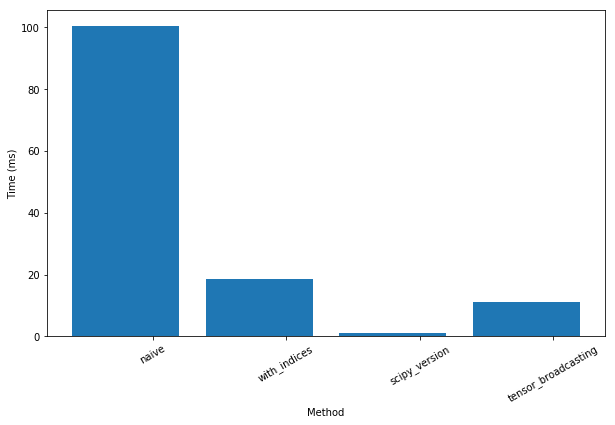

In [47]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(methods)), [r.best*1000 for r in timers], log=False)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods))+0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel('Method')
plt.ylabel('Time (ms)')
plt.show()